In [1]:
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

In [43]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import mean_squared_error

In [61]:
file_path = "/home/bharat/proj/time_series1/4200_C005_2019_03_03.tsv"
df = pd.read_csv(file_path, sep=',', header=None)
df.columns = ["kunag", "matnr", "date", "quantity","price"]

In [54]:
import numpy as np
import pandas as pd
import datetime


def n_series(input_df,kunag,matnr):
    input_df = input_df[input_df["quantity"] >=0]    
    df = input_df.copy()
    n_df1 = df[(df["kunag"] == kunag) & (df["matnr"] == matnr)]
    n_df1.date = n_df1.date.apply(lambda x : pd.to_datetime(x,format = '%Y%m%d', errors='ignore'))
    n_df1 = n_df1.sort_values('date')
    n_df1.set_index('date',inplace=True)
    weekly_resampled_data = n_df1.quantity.resample('W').sum() 
    weekly_resampled_data = weekly_resampled_data.replace(np.nan, 0)
    individual_series = weekly_resampled_data.to_frame()
#     dataset = individual_series.values
    # normalize the dataset
#     dataset = dataset.astype('float32')

#     scaler = MinMaxScaler(feature_range=(0, 1))
#     dataset = scaler.fit_transform(dataset)
    individual_series = individual_series.reset_index()
    return individual_series


def train_test_split(input_df,kunag,matnr,i):
    data= n_series(input_df,kunag,matnr)
    train = data[0:-i]    
    test = data[-i:]
#     train = train.astype('float32')
#     test = test.astype('float32')

#     scaler = MinMaxScaler(feature_range=(0, 1))
#     train = scaler.fit_transform(train)
#     test = scaler.fit_transform(test)
    return train,test

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [55]:
train,test=  train_test_split(df,500056565,100278,16)

In [56]:
dataframe = n_series(df,500056565, 100278)


In [57]:
df = dataframe[:-16]
df_training_complete = df
print(df_training_complete.shape)
  
df_training_processed = df_training_complete.iloc[:, 1:2].values  

scaler = MinMaxScaler(feature_range = (0, 1))
df_training_scaled = scaler.fit_transform(df_training_processed)  

features_set = []  
labels = []  
for i in range(16, 118):  
    features_set.append(df_training_scaled[i-16:i, 0])
    labels.append(df_training_scaled[i, 0])
    
features_set, labels = np.array(features_set), np.array(labels)  
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  
print(features_set.size)

(119, 2)
1632


In [10]:
model = Sequential()  
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  
model.add(Dropout(0.2))  
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))
model.add(LSTM(units=50))  
model.add(Dropout(0.2))
model.add(Dense(units = 1))  
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  
model.fit(features_set, labels, epochs = 100, batch_size = 32)  
df_testing_complete = pd.read_csv(r'testing.csv')  
df_testing_processed = df_testing_complete.iloc[:, 1:2].values 

W0708 15:19:14.605232 139697772476224 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 15:19:14.616620 139697772476224 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 15:19:14.619165 139697772476224 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 15:19:15.046592 139697772476224 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0708 15:19:15.052483 

Epoch 1/100
102/102 [==============================] - 2s 20ms/step - loss: 0.0692
Epoch 2/100
102/102 [==============================] - 0s 886us/step - loss: 0.0507
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0491
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0488
Epoch 5/100
102/102 [==============================] - 0s 888us/step - loss: 0.0460
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0484
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0480
Epoch 8/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0469
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0446
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0470
Epoch 11/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0451
Epoch 12/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0459
Epoch 13

102/102 [==============================] - 0s 1ms/step - loss: 0.0443
Epoch 99/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0424
Epoch 100/100
102/102 [==============================] - 0s 876us/step - loss: 0.0435


In [11]:
df_total = pd.concat((df_training_complete['quantity'], df_testing_complete['quantity']), axis=0)  
test_inputs = df_total[len(df_total) - len(df_testing_complete) - 16:].values  
test_inputs = test_inputs.reshape(-1,1)  
test_inputs = scaler.transform(test_inputs) 

test_features = []  
for i in range(16, 32):  
    test_features.append(test_inputs[i-16:i, 0])
    
test_features = np.array(test_features)  
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

predictions = model.predict(test_features)  
predictions = scaler.inverse_transform(predictions)  

In [62]:
train,test=  train_test_split(df,500056565,100278,16)

In [63]:
df_c = pd.DataFrame(data=predictions)

In [64]:
test.reset_index(inplace = True)
pred = pd.concat([test, df_c], axis=1, join_axes=[test.index])
pred.set_index("date",inplace = True)
del pred["index"]
del pred["quantity"]
del test["index"]


In [65]:

mae = mean_absolute_error(test.quantity, pred[0])
rms = sqrt(mean_squared_error(test.quantity, pred[0]))
print("mae :",mae)
print("rms :",rms)

('mae :', 1.592716321349144)
('rms :', 1.7276498582050999)


In [73]:
dataframe.tail()

,date,quantity
130,2019-01-20,2.0
131,2019-01-27,0.0
132,2019-02-03,0.0
133,2019-02-10,0.0
134,2019-02-17,2.0


In [71]:
test.tail()

,quantity
date,
2019-01-20,2.0
2019-01-27,0.0
2019-02-03,0.0
2019-02-10,0.0
2019-02-17,2.0


In [72]:
train.tail()

,quantity
date,
2018-09-30,0.0
2018-10-07,2.0
2018-10-14,2.0
2018-10-21,0.0
2018-10-28,0.0


In [74]:
dataframe.set_index('date',inplace=True)
# train.set_index('date',inplace=True)
# test.set_index('date',inplace=True)

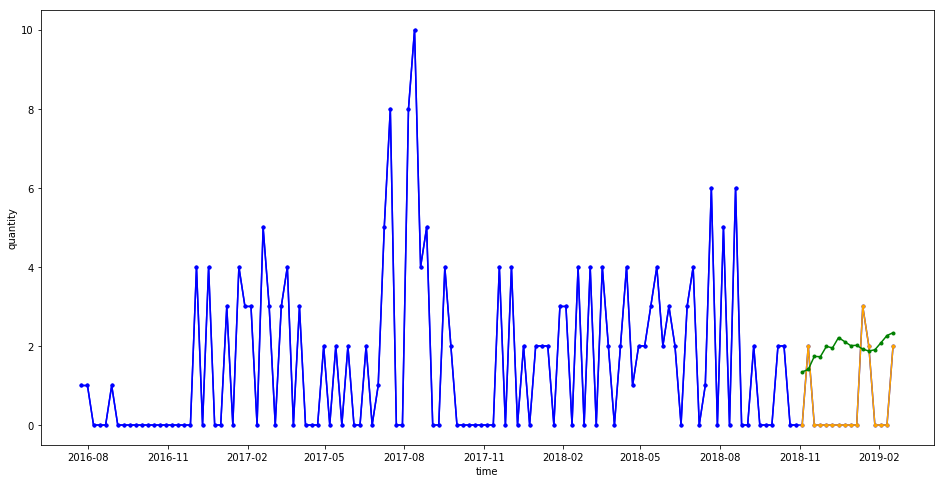

In [75]:
plt.figure(figsize=(16,8))
plt.plot( dataframe, marker='.', color='blue')
plt.plot( train, marker='.', color='blue')
plt.plot( test, marker='.', color='orange')
plt.plot(pred,marker = ".",color = 'green')
plt.xlabel("time")
plt.ylabel('quantity')
# plt.savefig("/home/rahul/Downloads/bharat/time_series1/high_freq_plots/" + 'Graph_{}.png'.format(index), format="PNG")  

plt.show()
